In [1]:
!pip install pyodbc

In [2]:
import pyodbc

In [3]:
print("pyodbc is ready!")

pyodbc is ready!


In [4]:
conn = pyodbc.connect(
    "Driver={SQL Server};"
    "Server=hp;"
    "Database=employee_details;"
    "Trusted_Connection=yes;"
)

cursor = conn.cursor()

In [8]:
cursor.execute("SELECT * FROM EmployeeRecords")
rows = cursor.fetchall()

for row in rows:
    print(row)

(1, 'John', 'Miller', 'HR', Decimal('60000.00'))
(2, 'Jane', 'Smith', 'Finance', Decimal('75000.00'))
(3, 'John', 'Miller', 'HR', Decimal('60000.00'))
(4, 'Emily', 'Davis', 'IT', Decimal('85000.00'))
(5, 'Michael', 'Brown', 'Finance', Decimal('75000.00'))
(6, 'Jane', 'Smith', 'Finance', Decimal('75000.00'))
(7, 'kane', 'smith', 'IT', Decimal('65000.00'))
(8, 'ily', 'Davis', 'HR', Decimal('70000.00'))
(9, 'happy', 'smith', None, None)
(10, '', 'Brown', 'IT', Decimal('64000.00'))
(11, 'tom', 'smith', '0', Decimal('78000.00'))


In [9]:
cursor.execute("SELECT COUNT(*) FROM EmployeeRecords")
total = cursor.fetchone()[0]
print(f"Total Employees: {total}")


Total Employees: 11


In [12]:
cursor.execute("SELECT AVG(Salary) FROM EmployeeRecords")
avg_salary = cursor.fetchone()[0]
print(f"Average Salary: {avg_salary}")

Average Salary: 70700.000000


In [13]:
cursor.execute("SELECT MAX(Salary) FROM EmployeeRecords")
max_salary=cursor.fetchone()[0]
print(f"Maximum salary of emp:{max_salary}")

Maximum salary of emp:85000.00


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:

# Query and load into pandas
df = pd.read_sql("SELECT * FROM EmployeeRecords", conn)

# Show first few rows
df.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_13600\2033404620.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM EmployeeRecords", conn)


,EmployeeID,FirstName,LastName,Department,Salary
0,1,John,Miller,HR,60000.0
1,2,Jane,Smith,Finance,75000.0
2,3,John,Miller,HR,60000.0
3,4,Emily,Davis,IT,85000.0
4,5,Michael,Brown,Finance,75000.0


In [19]:
df.describe()               # Summary stats


,EmployeeID,Salary
count,11.000000,10.000000
mean,6.000000,70700.000000
std,3.316625,8300.602388
min,1.000000,60000.000000
25%,3.500000,64250.000000
50%,6.000000,72500.000000
75%,8.500000,75000.000000
max,11.000000,85000.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EmployeeID  11 non-null     int64  
 1   FirstName   11 non-null     object 
 2   LastName    11 non-null     object 
 3   Department  10 non-null     object 
 4   Salary      10 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 572.0+ bytes


In [23]:
df.shape

(11, 5)

In [27]:
df.isnull().sum()

EmployeeID    0
FirstName     0
LastName      0
Department    1
Salary        1
dtype: int64

In [20]:
df['Department'].value_counts() # count by department


Department
HR         3
Finance    3
IT         3
0          1
Name: count, dtype: int64

In [21]:
df.groupby('Department')['Salary'].mean() # avg salary by dept

Department
0          78000.000000
Finance    75000.000000
HR         63333.333333
IT         71333.333333
Name: Salary, dtype: float64

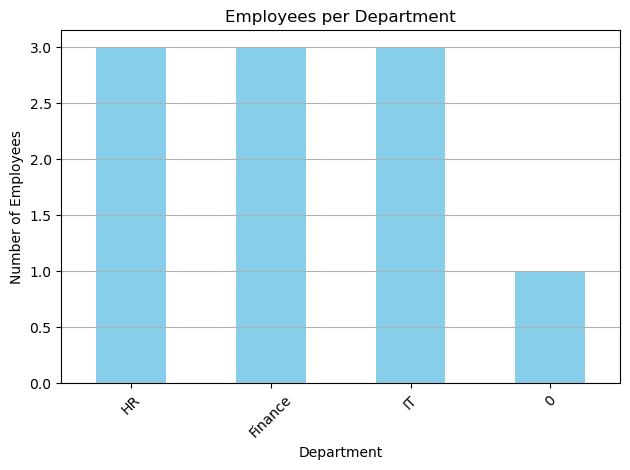

In [31]:

dept_counts = df['Department'].value_counts()

dept_counts.plot(kind='bar', color='skyblue')
plt.title('Employees per Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_13600\62740139.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='Salary', data=df, palette='pastel')


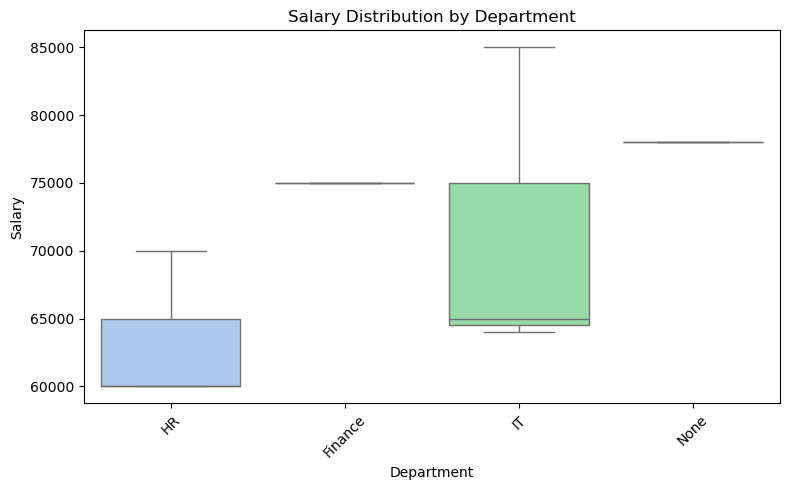

In [37]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Department', y='Salary', data=df, palette='pastel')
plt.title('Salary Distribution by Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
df['Department'].unique()

array(['HR', 'Finance', 'IT', None, '0'], dtype=object)

In [35]:
df['Department'] = df['Department'].replace('0', 'None')

In [36]:
print(df['Department'].unique())

['HR' 'Finance' 'IT' None 'None']
